# PySAN Test Area

length: 20
alphabet: {1, 2, 3, 4}
sequence universe: 1,099,511,627,776
bigrams: [[1, 4], [3, 2], [1, 2], [3, 4], [2, 1], [2, 3], [4, 2], [4, 1], [2, 2], [1, 1]]
bigram universe: 16


<module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

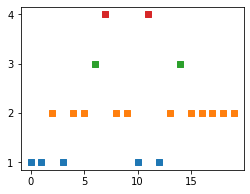

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../')

import pysan as ps

sequence = [1,1,2,1,2,2,3,4,2,2,1,4,1,2,3,2,2,2,2,2]

details = ps.describe(sequence)
ps.plot_sequence(sequence)

In [2]:
def longest_spell(sequence):
    # longest subset of contiguous identical elements (aka run or episode)
    pass


In [11]:
def get_element_prevalence(sequence):
    
    elements = ps.get_alphabet(sequence)
    
    prevalences = {}
    for element in elements:
        prevalences[element] = sequence.count(element)
        
    return prevalences

def get_element_frequency(sequence):
    """
    Computes the relative frequency of each element in a sequence, returning a dictionary where each key is an element and each value is that elements relative frequency.
    """
    
    elements = ps.get_alphabet(sequence)
    
    prevalences = {}
    for element in elements:
        prevalences[element] = sequence.count(element) / len(sequence)
        
    return prevalences

get_element_prevalence(sequence)
get_element_frequency(sequence)

{1: 0.25, 2: 0.55, 3: 0.1, 4: 0.1}

In [39]:
def get_all_ngrams(sequence, n=2):
    all_ngram_indexes = [[x, x + 1] for x in range(len(sequence) - 1)]
    
    all_ngrams = []
    for ngram_indexes in all_ngram_indexes:
        this_ngram = str([sequence[x] for x in ngram_indexes])
        all_ngrams.append(eval(this_ngram))
    print(all_ngrams)
    return all_ngrams

import pandas as pd
def get_transition_matrix(sequence):
    """
    Computes a transition matrix for each bigram in a sequence.
    The resulting matrix can be interpreted by reading along the top row first, then down the side, indicating from the element in the top row to the element along the side.
    For example, to find the number of transitions from element 2 to element 3, find element 2 across the top, then follow that column down until it reaches element 3 on the side.
    """
    alphabet = ps.get_alphabet(sequence)
    all_ngrams = get_all_ngrams(sequence)
    
    transition_matrix = np.zeros((len(alphabet), len(alphabet)))
    
    for x, element_row in enumerate(alphabet):
        for y, element_column in enumerate(alphabet):
            current_ngram = [element_row, element_column]
            #print('from', current_ngram[0], 'to', current_ngram[1], ':', all_ngrams.count(current_ngram))
            transition_matrix[y, x] = all_ngrams.count(current_ngram)
            
    tm_df = pd.DataFrame(transition_matrix, columns=alphabet, index=alphabet)
    return tm_df
    
get_transition_matrix(sequence)

[[1, 1], [1, 2], [2, 1], [1, 2], [2, 2], [2, 3], [3, 4], [4, 2], [2, 2], [2, 1], [1, 4], [4, 1], [1, 2], [2, 3], [3, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
from 1 to 1 : 1
from 1 to 2 : 3
from 1 to 3 : 0
from 1 to 4 : 1
from 2 to 1 : 2
from 2 to 2 : 6
from 2 to 3 : 2
from 2 to 4 : 0
from 3 to 1 : 0
from 3 to 2 : 1
from 3 to 3 : 0
from 3 to 4 : 1
from 4 to 1 : 1
from 4 to 2 : 1
from 4 to 3 : 0
from 4 to 4 : 0


,1,2,3,4
1,1.0,2.0,0.0,1.0
2,3.0,6.0,1.0,1.0
3,0.0,2.0,0.0,0.0
4,1.0,0.0,1.0,0.0
